# Regression with a Crab Age dataset

"The dataset for this competition (both train and test) was generated from a deep learning model trained on the Crab Age Prediction dataset."

The **aim** is to predict the **age**.

- [Kaggle challenge](https://www.kaggle.com/competitions/playground-series-s3e16/data?select=test.csv)
- [Original Dataset](https://www.kaggle.com/datasets/sidhus/crab-age-prediction)

In [22]:
# importing standard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit

from xgboost import XGBRegressor

In [23]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'axes.titlesize': 16,
    'figure.figsize': (12, 4),
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('colorblind'), 
              rc=theme_parameters)

# Read Data

In [24]:
read_from_kaggle = False

In [25]:
if read_from_kaggle:
    
    data = pd.read_csv('',
                       index_col=0)
    orig_data = pd.read_csv('',
                            index_col=0)
    
    
else:

    train_data = pd.read_csv("./../data/crab_age_train.csv",
                             index_col=0)
    test_data = pd.read_csv("./../data/crab_age_test.csv",
                            index_col=0)
    orig_data = pd.read_csv("./../data/crab_age_original.csv")

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [27]:
train_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49368 entries, 74051 to 123418
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             49368 non-null  object 
 1   Length          49368 non-null  float64
 2   Diameter        49368 non-null  float64
 3   Height          49368 non-null  float64
 4   Weight          49368 non-null  float64
 5   Shucked Weight  49368 non-null  float64
 6   Viscera Weight  49368 non-null  float64
 7   Shell Weight    49368 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.4+ MB


In [29]:
test_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [30]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [31]:
orig_data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


# EDA - Exploratory Data Analysis

## Numeric Feature Distribution Train vs Test vs Original Data KDEs

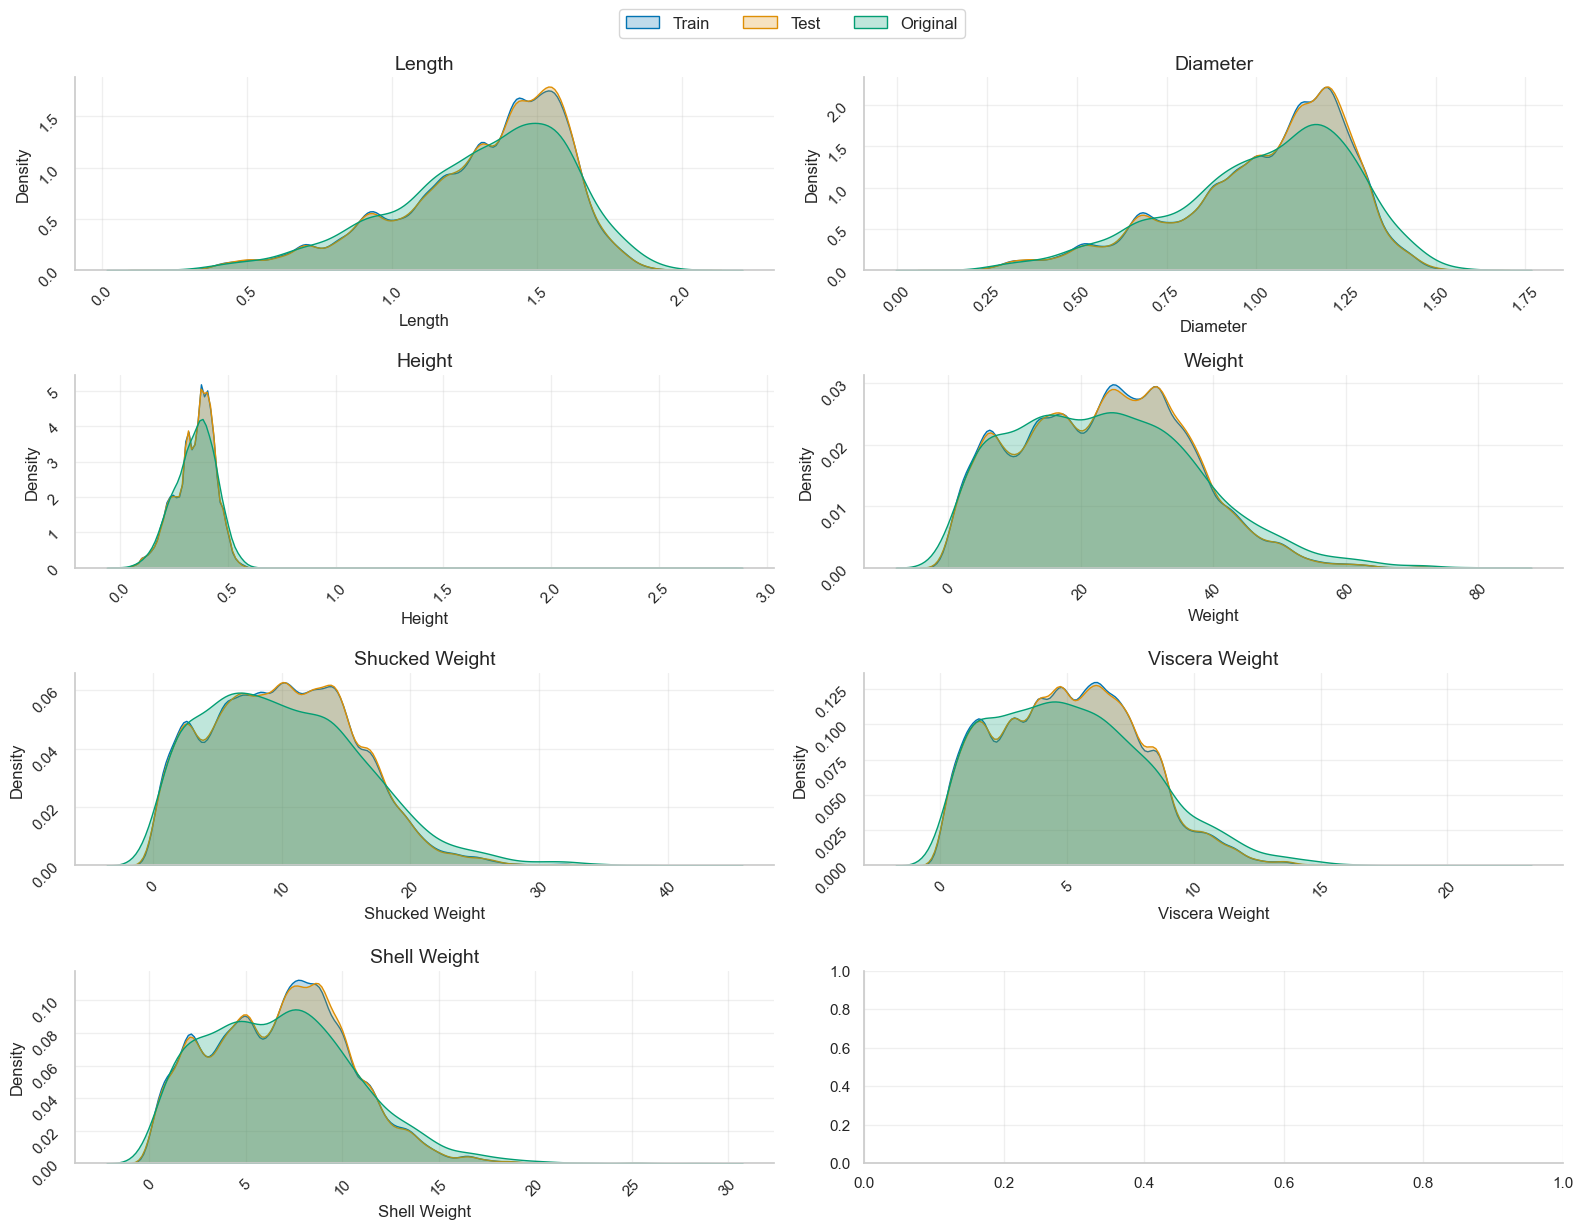

In [34]:
figure, ax = plt.subplots(4, 2, figsize=(16, 12))
ax = ax.flatten()

# create a list to exclude categorical features and the label
exclude_indices = [0, 8]

for index, col_name in enumerate([col for idx, col in enumerate(train_data.columns) if idx not in exclude_indices]):
    
    sns.kdeplot(data=train_data[col_name],
                label='Train',
                fill=True,
                ax=ax[index])
    
    sns.kdeplot(data=test_data[col_name],
                label='Test',
                fill=True,
                ax=ax[index])
    
    sns.kdeplot(data=orig_data[col_name],
                label='Original',
                fill=True,
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()

# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=12,
              ncol=3)

plt.tight_layout()
plt.show()

## Numeric Feature Distribution Challenge vs Original Data KDEs

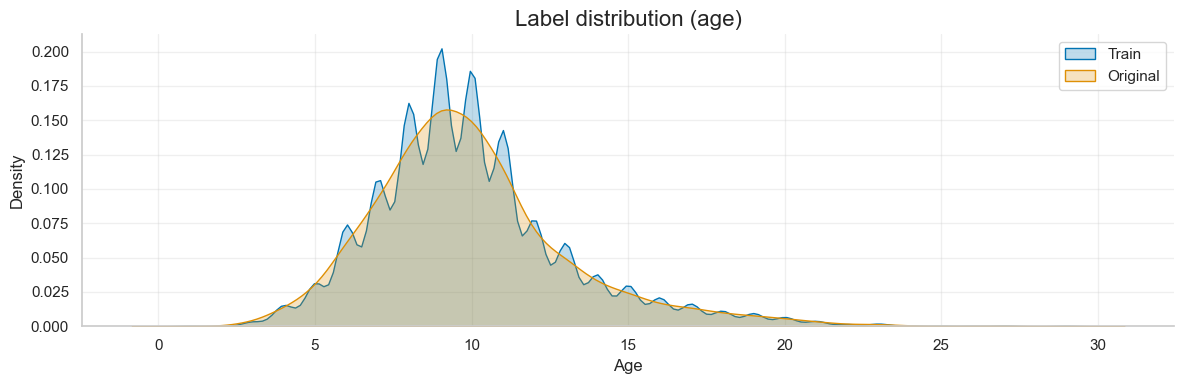

In [35]:
sns.kdeplot(data=train_data['Age'],
            label='Train',
            fill=True)

sns.kdeplot(data=orig_data['Age'],
            label='Original',
            fill=True)

plt.title('Label distribution (age)')

plt.legend()

plt.tight_layout()
plt.show()

## Categorical Features

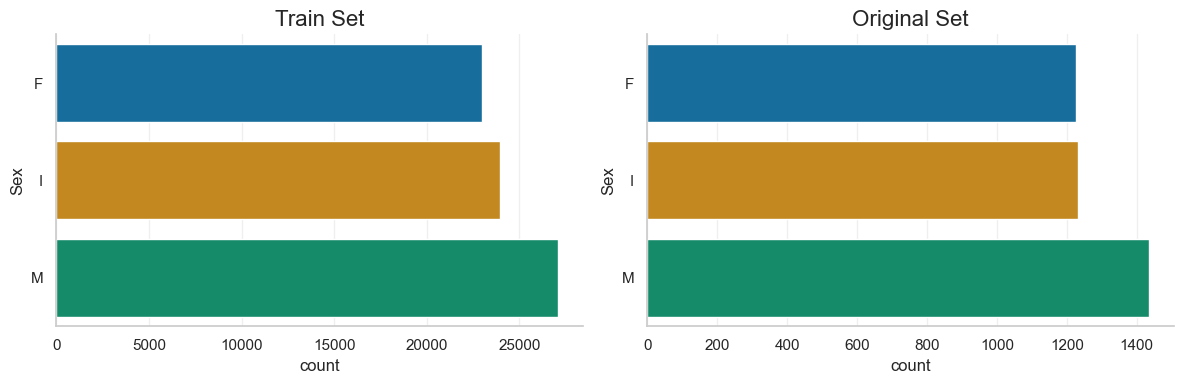

In [37]:
figure, ax = plt.subplots(1, 2, figsize=(12, 4))
ax = ax.flatten()

sns.countplot(data=train_data.sort_values('Sex'), 
              y="Sex",
              ax=ax[0])

sns.countplot(data=orig_data.sort_values('Sex'), 
              y="Sex",
              ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Original Set')

plt.tight_layout()
plt.show()